# Introduction to neural network classification with Tensorflow

In this notebook we're going to learn how to write neural networks for classificarion problems.

A few Classification problems
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Creating data to view and fit

In [4]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
     

In [5]:
# Check out the features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [6]:
# Check the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int64)

Our data is a little hard to understand right now soo let's visualize it!

In [7]:
import pandas as pd
circles=pd.DataFrame({"X0":X[:,0],"X1":X[:,1],"label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


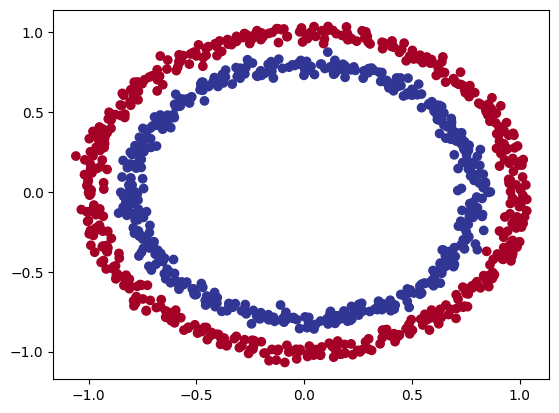

In [8]:
# Visualize with a plot 
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu);

## Input and Output Shapes

In [6]:
# Check the shape of our features and labels
X.shape,y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working
len(X),len(y)

(1000, 1000)

In [8]:
# view the first example of features and labels
X[0],y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modeling

The steps in modelling with TensorFlow are typically:

1. Create or import the model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [12]:
import tensorflow as tf

In [10]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model using the sequential API
model_1=tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryFocalCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X,y,epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 4ms/step - loss: 1.0689 - accuracy: 0.4890
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 0.1960 - accuracy: 0.4980
Epoch 3/5
32/32 [==============================] - 0s 5ms/step - loss: 0.1778 - accuracy: 0.4950
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 0.1743 - accuracy: 0.4900
Epoch 5/5
32/32 [==============================] - 0s 5ms/step - loss: 0.1737 - accuracy: 0.4790


In [11]:
# let's try and improve our model by trainig for longer
model_1.fit(X,y,epochs=200,verbose=0)
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.1735 - accuracy: 0.5000


[0.17345525324344635, 0.5]

Since we're working on a binary classification problem and our model is getting around ~48% accuracy its performing as if it's guessing 

So let's step thing sup a notch and add an extra layer

In [12]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create a model this time with 2 layers 
model_2=tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])  

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 4ms/step - loss: 0.8698 - accuracy: 0.5000
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6993 - accuracy: 0.4640
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6967 - accuracy: 0.4740
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6954 - accuracy: 0.5040
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6950 - accuracy: 0.5100
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.4850
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5100
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6945 - accuracy: 0.4990
Epoch 9/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.5050
Epoch 10/200
32/32 [==============================] - 0s 3ms/step - loss: 0.6939 - accuracy: 0.4830
Epoch 11/

In [13]:
# 4. Evaluate the model
model_2.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934708952903748, 0.5]

## Improving our model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model-we might to add more layers or increase the number of hidden units within a layer.
2. Compiling a model - here we might to choose a different optimization funtion such as Adam instead of SGD.
3. Fitting the model - perhaps we might fit our model for more epochs(leave it for training for some time)

In [14]:
# Setting up the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_3=tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"]
                )

# 3. Fiting the model
model_3.fit(X,y,epochs=200)

Epoch 1/200
32/32 [==============================] - 0s 4ms/step - loss: 2.6565 - accuracy: 0.4530
Epoch 2/200
32/32 [==============================] - 0s 4ms/step - loss: 0.7074 - accuracy: 0.4810
Epoch 3/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6983 - accuracy: 0.4700
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.4830
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6944 - accuracy: 0.4770
Epoch 6/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6943 - accuracy: 0.4770
Epoch 7/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6940 - accuracy: 0.5070
Epoch 8/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6948 - accuracy: 0.5050
Epoch 9/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4890
Epoch 10/200
32/32 [==============================] - 0s 4ms/step - loss: 0.6946 - accuracy: 0.4370
Epoch 11/

In [15]:
# 4. Evaluate the model
model_3.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6937 - accuracy: 0.4840


[0.6936765909194946, 0.484000027179718]

In [16]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [17]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_4 = tf.keras.Sequential([
  # Before TensorFlow 2.7.0
  # tf.keras.layers.Dense(100), # add 100 dense neurons

  # With TensorFlow 2.7.0
  # tf.keras.layers.Dense(100, input_shape=(None, 1)), # add 100 dense neurons

  ## After TensorFlow 2.8.0 ##
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_4.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(), # use Adam instead of SGD
                metrics=['accuracy'])

# 3. Fit the model
model_4.fit(X, y, epochs=100, verbose=1) # fit for 100 passes of the data

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 2.8359 - accuracy: 0.4700
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7220 - accuracy: 0.4960
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6947 - accuracy: 0.4990
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6992 - accuracy: 0.5130
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6981 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7003 - accuracy: 0.4700
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6980 - accuracy: 0.5040
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6949 - accuracy: 0.5140
Epoch 9/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7007 - accuracy: 0.4890
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6952 - accuracy: 0.4790
Epoch 11/

In [18]:
model_4.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6977 - accuracy: 0.5140


[0.6977087259292603, 0.5139999985694885]

In [19]:
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 100)               300       
                                                                 
 dense_7 (Dense)             (None, 10)                1010      
                                                                 
 dense_8 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


In [20]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 100)               300       
                                                                 
 dense_4 (Dense)             (None, 10)                1010      
                                                                 
 dense_5 (Dense)             (None, 1)                 11        
                                                                 
Total params: 1,321
Trainable params: 1,321
Non-trainable params: 0
_________________________________________________________________


To visulaoze our model's function let's create a function `plot_decision_boundary()` , this function will :
* Take in a trained model,features(X) and labels(Y)
* Create a meshgrid of the different X values
* Male predictions across the meshgrid
* Plot the predictions as well as a line between zones(where each unique class fails)

In [21]:
import numpy as np
import matplotlib.pyplot as plt

In [22]:
def plot_decision_boundary(model, X, y):
    """Plots the decision boundary created by a model predicting on X"""
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Create X values (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()]  # stack the 2D arrays together

    # Make predictions
    y_pred = model.predict(x_in)

    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("Doing multiclass classification")
        # We have to reshape our predictions to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("Doing binary classification")        
        y_pred = np.round(y_pred).reshape(xx.shape)

    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()


313/313 [==============================] - 0s 1ms/step
Doing binary classification


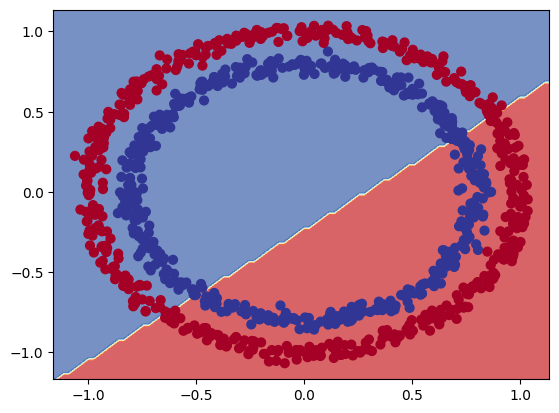

In [23]:
# Check out the predictions of our model is making
plot_decision_boundary(model=model_4,X=X,y=y)

In [24]:
# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

In [25]:
# Fit our model to the regression data
model_4.fit(X_reg_train,y_reg_train,epochs=100)

Epoch 1/100


ValueError: in user code:

    File "c:\Users\vudut\anaconda3\envs\tfamd\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "c:\Users\vudut\anaconda3\envs\tfamd\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "c:\Users\vudut\anaconda3\envs\tfamd\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "c:\Users\vudut\anaconda3\envs\tfamd\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "c:\Users\vudut\anaconda3\envs\tfamd\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "c:\Users\vudut\anaconda3\envs\tfamd\lib\site-packages\keras\engine\input_spec.py", line 250, in assert_input_compatibility
        raise ValueError(

    ValueError: Exception encountered when calling layer "sequential_3" "                 f"(type Sequential).
    
    Input 0 of layer "dense_6" is incompatible with the layer: expected min_ndim=2, found ndim=1. Full shape received: (None,)
    
    Call arguments received by layer "sequential_3" "                 f"(type Sequential):
      • inputs=tf.Tensor(shape=(None,), dtype=int32)
      • training=True
      • mask=None


Oh wait we have compiled our model for a binary classification problem.

But we're now working on a regression problem let's change the model to suit our data

In [26]:
X_reg_train = tf.reshape(X_reg_train, (-1, 1))
Y_reg_train = tf.reshape(y_reg_train, (-1, 1))
X_reg_test = tf.reshape(X_reg_test, (-1, 1))
Y_reg_test = tf.reshape(y_reg_test, (-1, 1))



In [ ]:
tf.random.set_seed(42)

# 1. Creating our model
model_5 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),  
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])


# 2.Compile our model this time with a regression specific loss function
model_5.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["mae"])

# 3. Fit the model
model_5.fit(X_reg_train,y_reg_train,epochs=100)


Epoch 1/100
5/5 [==============================] - 0s 6ms/step - loss: 450.8813 - mae: 450.8813
Epoch 2/100
5/5 [==============================] - 0s 4ms/step - loss: 367.3214 - mae: 367.3214
Epoch 3/100
5/5 [==============================] - 0s 3ms/step - loss: 286.2399 - mae: 286.2399
Epoch 4/100
5/5 [==============================] - 0s 4ms/step - loss: 201.0307 - mae: 201.0307
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 110.7780 - mae: 110.7780
Epoch 6/100
5/5 [==============================] - 0s 4ms/step - loss: 48.7668 - mae: 48.7668
Epoch 7/100
5/5 [==============================] - 0s 4ms/step - loss: 72.8998 - mae: 72.8998
Epoch 8/100
5/5 [==============================] - 0s 5ms/step - loss: 65.9601 - mae: 65.9601
Epoch 9/100
5/5 [==============================] - 0s 4ms/step - loss: 46.4937 - mae: 46.4937
Epoch 10/100
5/5 [==============================] - 0s 4ms/step - loss: 48.3269 - mae: 48.3269
Epoch 11/100
5/5 [==============================]

In [28]:
print(f"X_reg_train shape: {X_reg_train.shape}")


X_reg_train shape: (150, 1)


2/2 [==============================] - 0s 4ms/step
X_reg_test shape: (50, 1)
Y_reg_test shape: (50,)
Y_reg_preds shape: (50,)


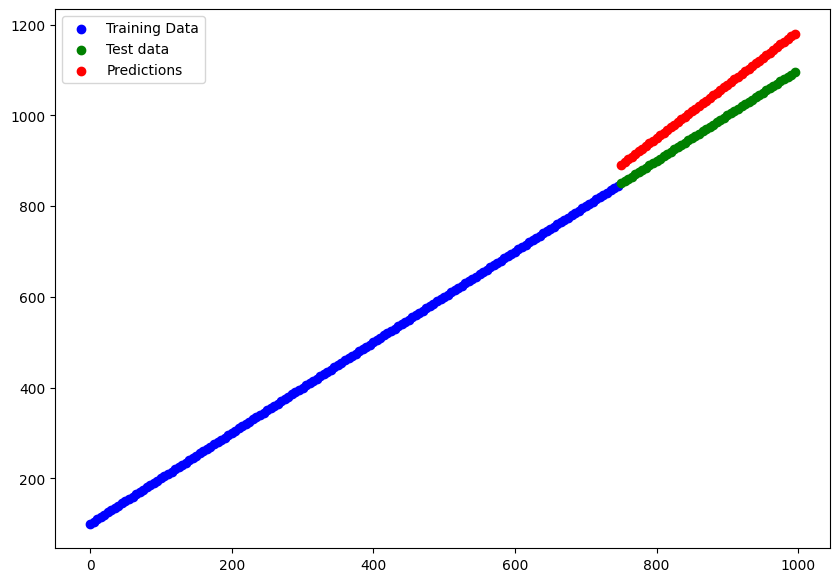

In [ ]:
# Fix the length of Y_reg_test to match X_reg_test
Y_reg_test = Y_reg_test[:50]

# Make predictions with our trained model
Y_reg_preds = model_5.predict(X_reg_test)

# Ensure Y_reg_preds has the correct shape
Y_reg_preds = Y_reg_preds.flatten()

# Check shapes for confirmation
print(f"X_reg_test shape: {X_reg_test.shape}")
print(f"Y_reg_test shape: {y_reg_test.shape}")
print(f"Y_reg_preds shape: {Y_reg_preds.shape}")

# Plot the model's predictions against our regression data
plt.figure(figsize=(10,7))
plt.scatter(X_reg_train, y_reg_train, c="b", label="Training Data")
plt.scatter(X_reg_test, y_reg_test, c="g", label="Test data")
plt.scatter(X_reg_test, Y_reg_preds, c="r", label="Predictions")
plt.legend()
plt.show()


### The Missing Piece: Non-linearity

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# 1. Creating the model
model_6=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="linear")
])

# 2. Compiling the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history=model_6.fit(X,y,epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 4ms/step - loss: 5.4474 - accuracy: 0.4800
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 5.4085 - accuracy: 0.4810
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 5.3561 - accuracy: 0.4830
Epoch 4/100
32/32 [==============================] - 0s 4ms/step - loss: 5.3044 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 5.2862 - accuracy: 0.4800
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 5.2747 - accuracy: 0.4810
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 5.2718 - accuracy: 0.4820
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 5.2617 - accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 5.2583 - accuracy: 0.4810
Epoch 10/100
32/32 [==============================] - 0s 4ms/step - loss: 5.2494 - accuracy: 0.4810
Epoch 11/

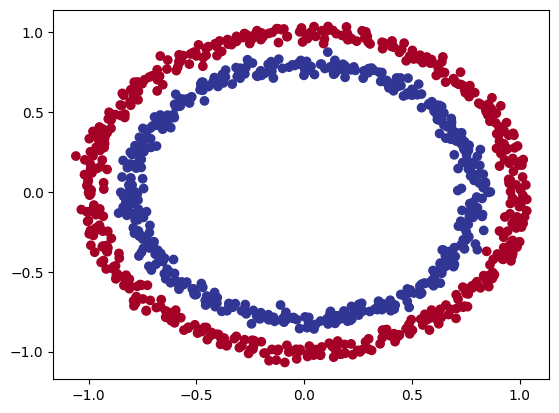

In [31]:
# Check out our data
plt.scatter(X[:,0],X[:,1],c=y,cmap=plt.cm.RdYlBu)

313/313 [==============================] - 0s 1ms/step
Doing binary classification


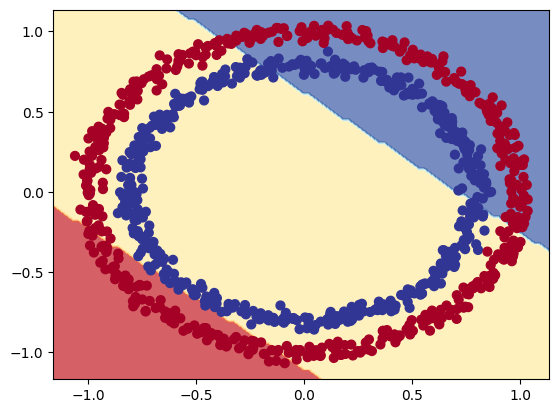

In [ ]:
# Check the decision boundaryfor our latest model
plot_decision_boundary(model=model_6,X=X,y=y)

Let's try to build our first neural network with a non-linear activation function

In [ ]:
# Set the random set
tf.random.set_seed(42)

# 1. Create the Model
model_7=tf.keras.Sequential([
    tf.keras.layers.Dense(1,activation="relu"),
    tf.keras.layers.dense(1)
    ])

# 2.Compile the model
model_7.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(learning_rate=.01),
                metrics=['accuracy'])

#3. Fitting the model
model_7.fit(X,y,epochs=100)

AttributeError: module 'keras.api._v2.keras.layers' has no attribute 'dense'

In [71]:
plot_decision_boundary(model=model_7,X=X,y=y)

InvalidArgumentError: Graph execution error:

Detected at node sequential_15_1/dense_29_1/Relu defined at (most recent call last):
  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\runpy.py", line 196, in _run_module_as_main

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\runpy.py", line 86, in _run_code

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\asyncio\windows_events.py", line 321, in run_forever

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\asyncio\base_events.py", line 603, in run_forever

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\asyncio\base_events.py", line 1909, in _run_once

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\asyncio\events.py", line 80, in _run

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\vudut\AppData\Local\Temp\ipykernel_18052\2676004999.py", line 1, in <module>

  File "C:\Users\vudut\AppData\Local\Temp\ipykernel_18052\3557076469.py", line 14, in plot_decision_boundary

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\utils\traceback_utils.py", line 118, in error_handler

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 513, in predict

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 212, in one_step_on_data_distributed

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 201, in one_step_on_data

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 93, in predict_step

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\utils\traceback_utils.py", line 118, in error_handler

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\layers\layer.py", line 816, in __call__

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\utils\traceback_utils.py", line 118, in error_handler

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\ops\operation.py", line 42, in __call__

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\utils\traceback_utils.py", line 157, in error_handler

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\models\sequential.py", line 203, in call

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\models\functional.py", line 188, in call

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\ops\function.py", line 153, in _run_through_graph

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\models\functional.py", line 572, in call

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\utils\traceback_utils.py", line 118, in error_handler

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\layers\layer.py", line 816, in __call__

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\utils\traceback_utils.py", line 118, in error_handler

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\ops\operation.py", line 42, in __call__

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\utils\traceback_utils.py", line 157, in error_handler

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\layers\core\dense.py", line 141, in call

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\activations\activations.py", line 47, in relu

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\activations\activations.py", line 99, in static_call

  File "c:\Users\vudut\anaconda3\envs\tfcpu\lib\site-packages\keras\src\backend\tensorflow\nn.py", line 16, in relu

In[1] is not a matrix
	 [[{{node sequential_15_1/dense_29_1/Relu}}]] [Op:__inference_one_step_on_data_distributed_184198]

In [46]:
# Time to replicate the mutli-layer neural network from Tensorflow Playground

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_8=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1)
])

# 2. Compiling the model
model_8.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=['accuracy'])

# 3. Fitting the model
history=model_8.fit(X,y,epochs=250)

Epoch 1/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 849us/step - accuracy: 0.4462 - loss: 1.2312 
Epoch 2/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - accuracy: 0.3835 - loss: 0.9225
Epoch 3/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 677us/step - accuracy: 0.3749 - loss: 0.8904
Epoch 4/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - accuracy: 0.3461 - loss: 0.8694
Epoch 5/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 711us/step - accuracy: 0.3218 - loss: 0.8540
Epoch 6/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.3061 - loss: 0.8424
Epoch 7/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 723us/step - accuracy: 0.2809 - loss: 0.8332
Epoch 8/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - accuracy: 0.2676 - loss: 0.8254
Epoch 9/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - accuracy: 0.2569 - loss: 0.8184
Epoch 10/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.2380 - loss: 0.8118
Epoch 11/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 737us/step - accuracy: 0.2222 - loss: 0.8059
Epoch 12/250
32/32 ━━━━━━━━━━━━━━━━━━━━ 

In [47]:
# Evaluate the model
model_8.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 863us/step - accuracy: 0.9957 - loss: 0.0448


[0.04032585769891739, 0.9929999709129333]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 631us/step
Doing binary classification


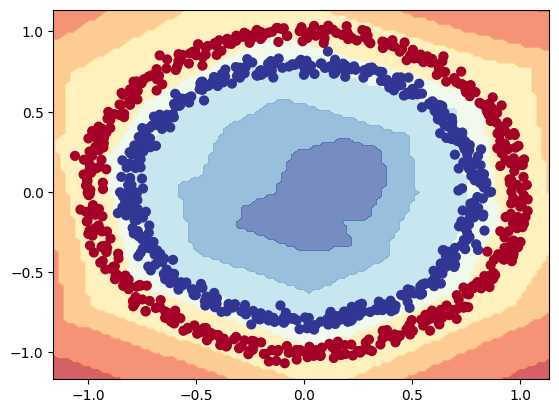

In [48]:
# How do our model predictions look
plot_decision_boundary(model_8,X,y)

In [56]:
#  Set the random seed
tf.random.set_seed(42)

# 1 Create the model
model_9=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2.Compile the model
model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.001),
                metrics=['accuracy'])

# 3.Fit the model
history=model_9.fit(X,y,epochs=300)

Epoch 1/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 779us/step - accuracy: 0.4849 - loss: 0.6909
Epoch 2/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 686us/step - accuracy: 0.5090 - loss: 0.6900
Epoch 3/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 702us/step - accuracy: 0.5045 - loss: 0.6894
Epoch 4/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 643us/step - accuracy: 0.5143 - loss: 0.6889
Epoch 5/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 728us/step - accuracy: 0.5072 - loss: 0.6884
Epoch 6/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 719us/step - accuracy: 0.5070 - loss: 0.6879
Epoch 7/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 694us/step - accuracy: 0.5167 - loss: 0.6874
Epoch 8/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.5204 - loss: 0.6869
Epoch 9/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 738us/step - accuracy: 0.5286 - loss: 0.6864
Epoch 10/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 659us/step - accuracy: 0.5332 - loss: 0.6859
Epoch 11/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 732us/step - accuracy: 0.5355 - loss: 0.6854
Epoch 12/300
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 

In [57]:
# Evaluate the model
model_9.evaluate(X,y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 618us/step - accuracy: 0.9989 - loss: 0.0444


[0.0432489737868309, 0.996999979019165]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step
Doing binary classification


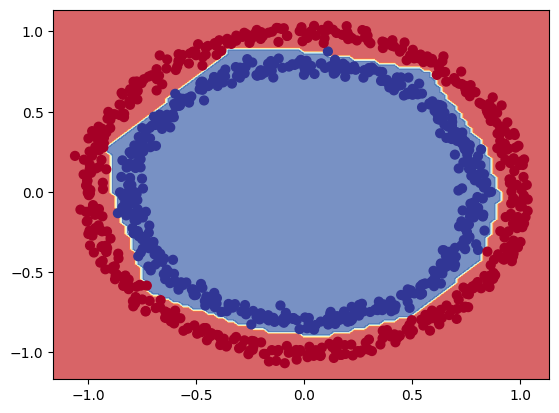

In [58]:
# let's visualize our incredible metrics
plot_decision_boundary(model_9,X,y)

**NOTE** : 
* The thing we are doing here is wrong because we are training the model on the same data that we are testing and evaluating on this might lead to over or under fitting the future

* The combination of linear and non linear functions is one of the key fundamentals of the neural networks

In [59]:
# Create a toy tensor (similar to the data that we pass into our models)
A=tf.cast(tf.range(-10,10),tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

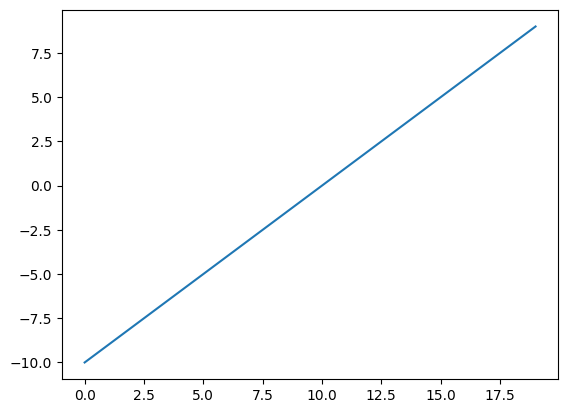

In [60]:
# Visualize our toy tensor
plt.plot(A)

In [61]:
# Let's start by replecating sigmoid-sigmoid(x)=1/(1+exp(-x))
def sigmoid(x):
    return 1/(1+tf.exp(-x))

# use the sigmoid function on our toy tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

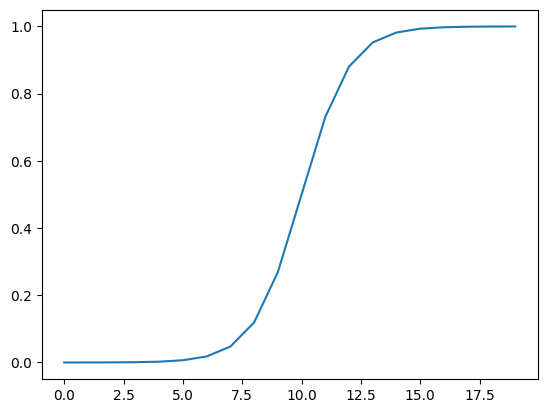

In [63]:
# Now plot the sigmoid function
plt.plot(sigmoid(A))

In [64]:
def relu(x):
    return tf.maximum(0,x)

# Now lets pass our toy tensor to our custom relu fucntion
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

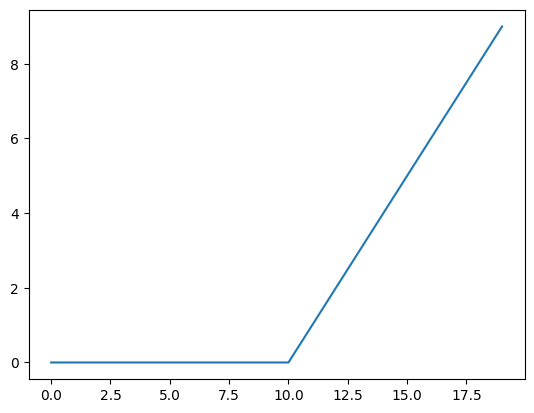

In [65]:
# Let's plot the relu values of the toy tensor
plt.plot(relu(A))

In [66]:
# Let's try the linear activation fucntion
def linear(x):
    return x

# Now lets pass our toy tensor into our custom linear activation function
linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

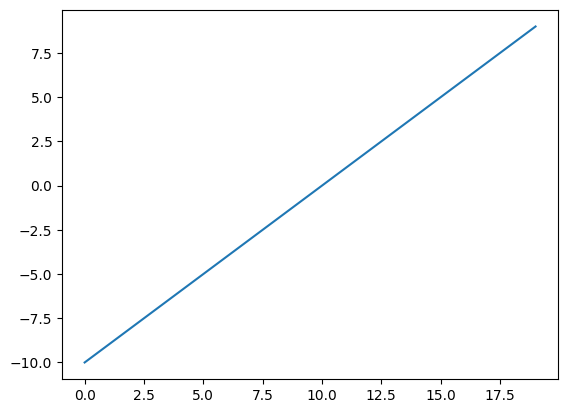

In [67]:
# Does the linear activation fucntion does anything
plt.plot(tf.keras.activations.linear(A))

### Evaluating and improving our classification

So far we've been training and testing on the same dataset 
.However,in machine learning this is a sin.
So let's create a training and test dataset

In [27]:
# Check how many examples we have
len(X)

1000

In [28]:
X,y

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        ...,
        [-0.13690036, -0.81001183],
        [ 0.67036156, -0.76750154],
        [ 0.28105665,  0.96382443]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
        0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
        0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
        1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
        1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
        0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
        1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
        0, 1, 1, 0, 1, 0, 1, 

In [9]:
X_train,y_train=X[:800],y[:800]
X_test,y_test=X[800:],y[800:]

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [38]:
# Let's recreate a model to fit on the trianing data and evaluate on the testing data

#Set the random seed
tf.random.set_seed(42)


# 1.Create the model
model_10=tf.keras.Sequential([
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(4,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

# 2. Compile the model
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                 metrics=["accuracy"])

# 3. Fit the model
history=model_10.fit(X_train,y_train,epochs=200)

Epoch 1/200
25/25 [==============================] - 0s 4ms/step - loss: 0.7001 - accuracy: 0.4775
Epoch 2/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6936 - accuracy: 0.4937
Epoch 3/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6916 - accuracy: 0.5312
Epoch 4/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6883 - accuracy: 0.5788
Epoch 5/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6824 - accuracy: 0.6087
Epoch 6/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6684 - accuracy: 0.7113
Epoch 7/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6529 - accuracy: 0.7412
Epoch 8/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6387 - accuracy: 0.7475
Epoch 9/200
25/25 [==============================] - 0s 4ms/step - loss: 0.6106 - accuracy: 0.7987
Epoch 10/200
25/25 [==============================] - 0s 4ms/step - loss: 0.5827 - accuracy: 0.8250
Epoch 11/

In [42]:
model_10.evaluate(X_test,y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.0558 - accuracy: 0.9750


[0.05577995255589485, 0.9749999642372131]

313/313 [==============================] - 0s 1ms/step
Doing binary classification


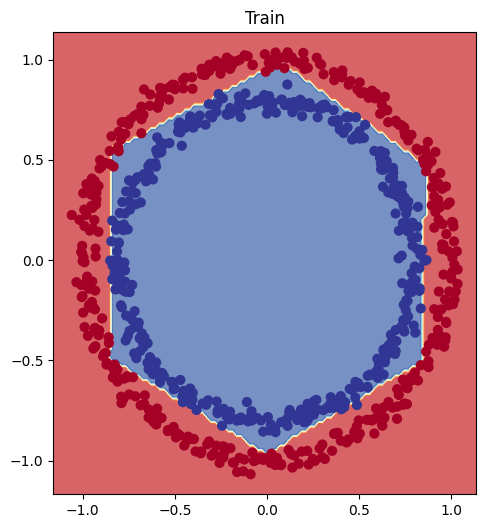

313/313 [==============================] - 0s 1ms/step
Doing binary classification


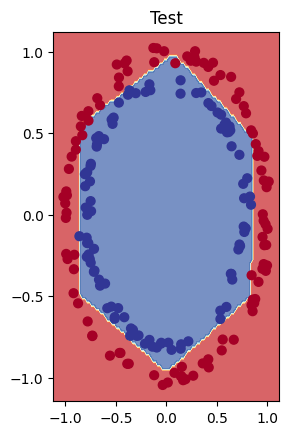

In [43]:
# Plot the descision boundaries for the training and test sets
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_10,X=X_train,y=y_train)
plt.subplot(1,2,1)
plt.title("Test")
plot_decision_boundary(model_10,X=X_test,y=y_test)
plt.show()

### Plotting the loss curves

In [44]:
# Convert the history object into a dataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.700119,0.47750
1,0.693615,0.49375
2,0.691559,0.53125
3,0.688331,0.57875
4,0.682380,0.60875
...,...,...
195,0.046067,0.98125
196,0.050513,0.98125
197,0.041546,0.98750
198,0.041746,0.98625


Text(0.5, 1.0, 'Model 10 loss curve')

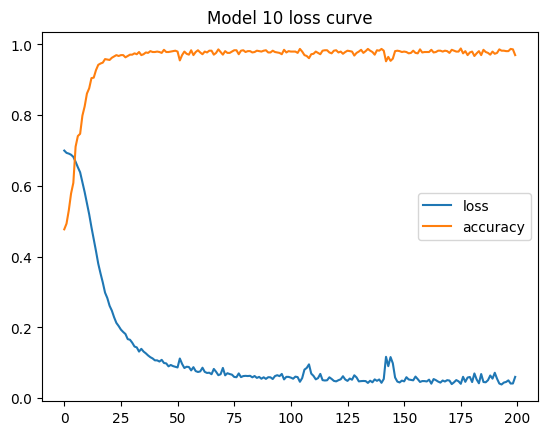

In [45]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model 10 loss curve")

**NOTE:** For many problems,the loss function going down means the model is improving(the predictions it's makiing are getting ground truth labels).

### Finding the best learning rate
TO find the ideal learning rate (the learning rate where the loss decreases the most in the training)we're gping to use the following steps:
* A learing rate **callback** - you can think of a callback as an extra piece of funtionality , you can add to your *while* its tarining.
* Another model(we could use the same one as above,but we're practicing building models here)
* A modified loss curves plot. 

<Axes: xlabel='epcohs'>

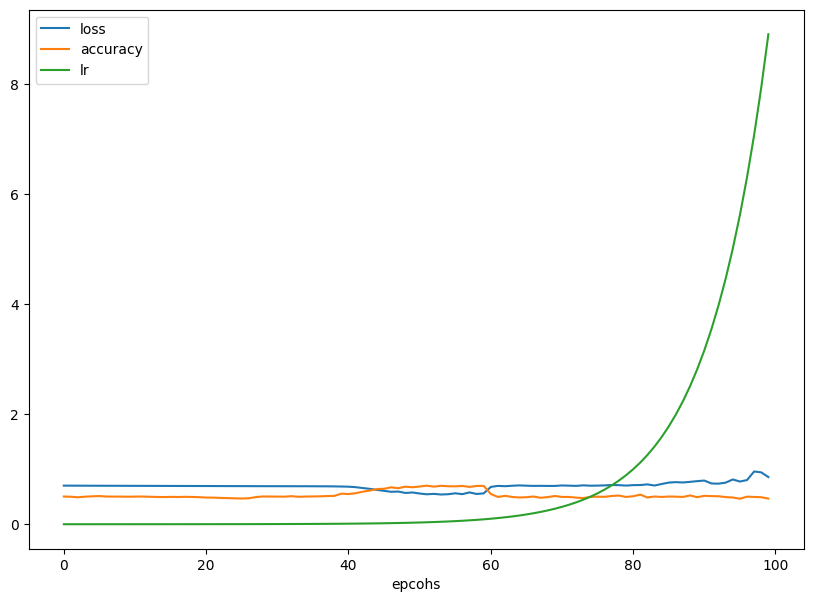

In [15]:
# Check out the history
pd.DataFrame(history_11.history).plot(figsize=(10,7),xlabel="epcohs")